In [1]:
import numpy as np
from sklearn.datasets import make_regression

In [5]:

     X,y = make_regression(n_samples=4, n_features=1, n_informative=1, n_targets=1,noise=80,random_state=13)
     

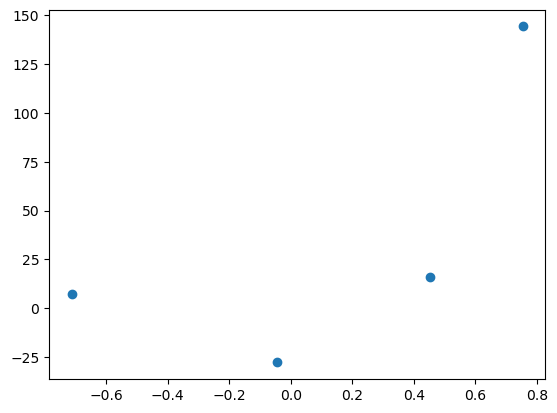

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [7]:
## apply OLS
from sklearn.linear_model import LinearRegression

In [9]:
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [14]:
reg.coef_   ## slope

array([78.35063668])

In [15]:
reg.intercept_

26.15963284313262

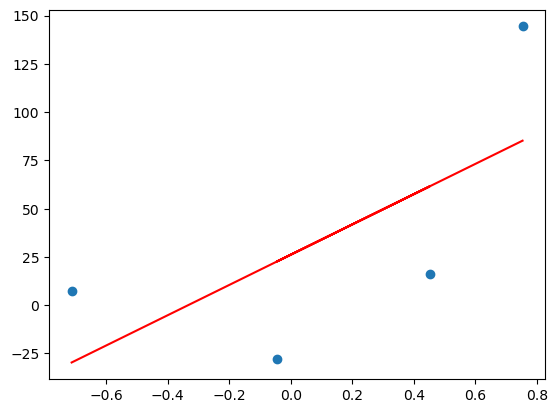

In [16]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red')

In [20]:
# Lets apply Gradient Descent assuming slope is constant m = 78.35
# and let's assume the starting value for intercept b = 100
y_pred = ((78.35 * X) + 100).reshape(4)
     

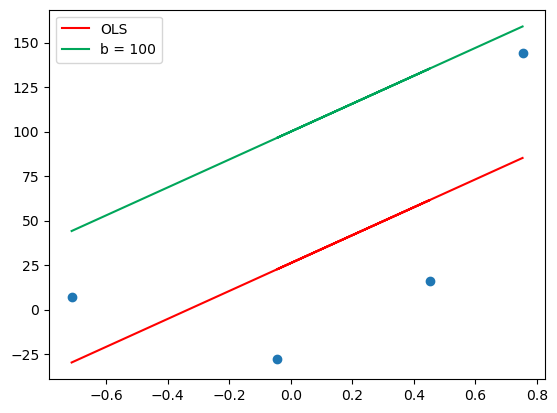

In [22]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred,color='#00a65a',label='b = 100')
plt.legend()
plt.show()
     

In [28]:
## m is constant
m= 78.35
b=100

loss_slope = -2*np.sum(y-m*X.ravel()-b)
loss_slope

590.7223659179078

In [29]:
# Lets take learning rate = 0.1
lr = 0.1

step_size = loss_slope*lr
step_size

59.072236591790784

In [30]:
# Calculating the new intercept
b = b - step_size
b

40.927763408209216

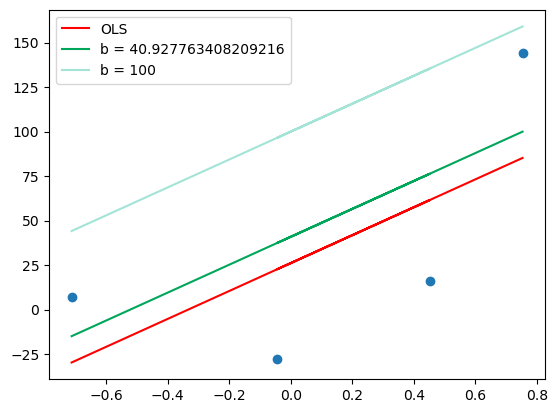

In [32]:
y_pred1 = ((78.35 * X) + b).reshape(4)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred1,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 100')
plt.legend()
plt.show()

In [33]:
## iteration 2


loss_slope = -2*np.sum(y-m*X.ravel()-b)
loss_slope

118.14447318358157

In [34]:
step_size = loss_slope*lr
step_size
     

11.814447318358157

In [35]:
b = b - step_size
b
     


29.11331608985106

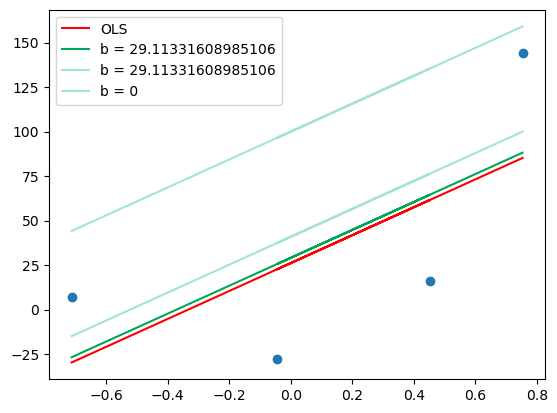

In [36]:
y_pred2 = ((78.35 * X) + b).reshape(4)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred2,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred1,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()
     

In [37]:
## it is still not reach to exact value of intercept lets apply one more iteration

In [38]:
# Iteration 3
loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

23.62889463671634

In [39]:
step_size = loss_slope*lr
step_size
     

2.362889463671634

In [40]:
b = b - step_size
b

26.750426626179426

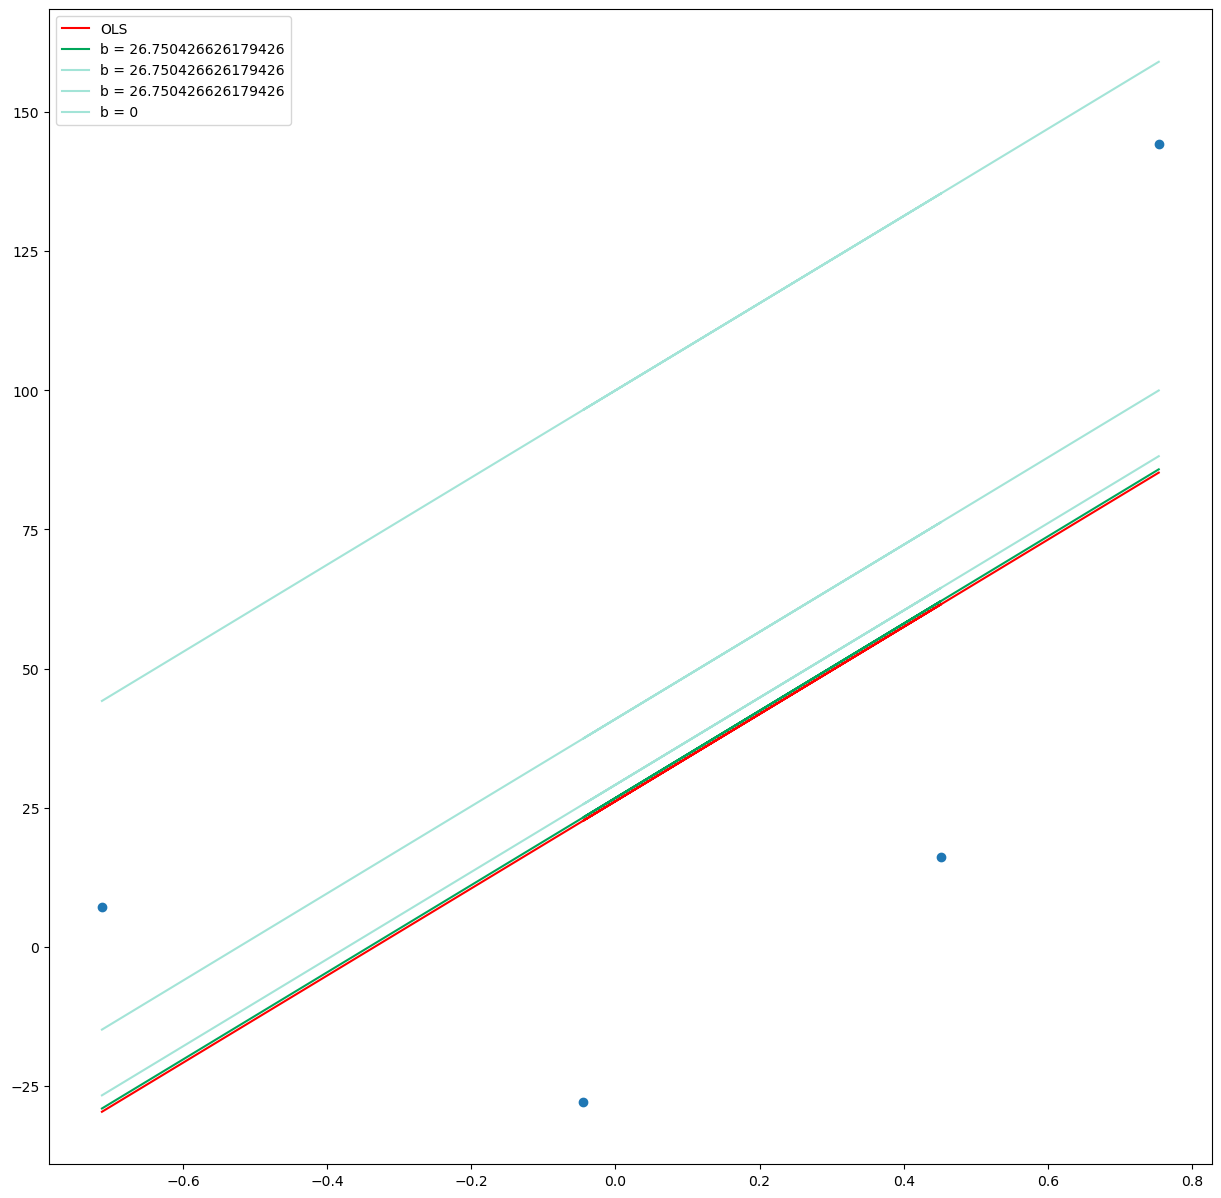

In [41]:
y_pred3 = ((78.35 * X) + b).reshape(4)

plt.figure(figsize=(15,15))
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred3,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred2,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred1,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

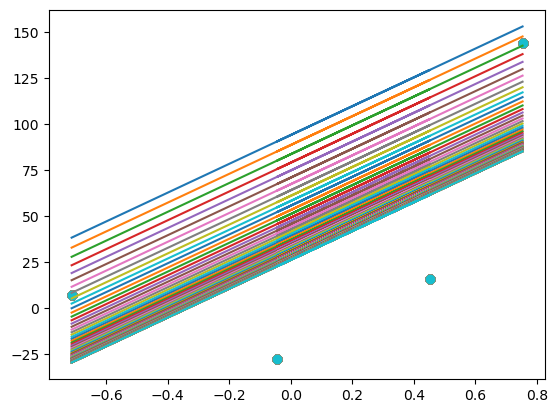

In [46]:
## apply the loop

b= 100
m=78.35
lr=0.01

epochs= 100

for i in range(epochs):
    loss_slope = -2*np.sum(y-m*X.ravel()-b)
    b= b - (lr * loss_slope)
    
    y_pred = m*X +b
    
    plt.plot(X,y_pred)
    
    plt.scatter(X,y)

In [47]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

In [48]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

In [55]:
X

array([[-0.71239066],
       [-0.43714566],
       [-0.45375238],
       [ 0.95283061],
       [ 0.23785784],
       [ 0.86121137],
       [-0.24332625],
       [ 0.18494595],
       [-0.72099967],
       [-0.42989708],
       [ 2.01522083],
       [ 0.39724133],
       [ 0.20780005],
       [-0.23242587],
       [-0.76862702],
       [ 0.45315861],
       [ 0.63988397],
       [ 0.3595323 ],
       [-1.61510796],
       [ 1.74924179],
       [-0.78898902],
       [-0.51196509],
       [-0.92833523],
       [ 2.15038297],
       [-0.2073497 ],
       [-1.63909341],
       [-0.33861825],
       [-0.32212366],
       [-0.48137142],
       [-0.52316421],
       [ 0.72196506],
       [ 0.76591105],
       [ 0.45348104],
       [-1.26160595],
       [-2.18711527],
       [-1.18541881],
       [ 0.21745166],
       [ 1.33031692],
       [-1.08718159],
       [ 0.56226171],
       [-1.51284512],
       [-0.00238903],
       [-0.27813452],
       [ 0.45181234],
       [ 1.19070527],
       [ 0

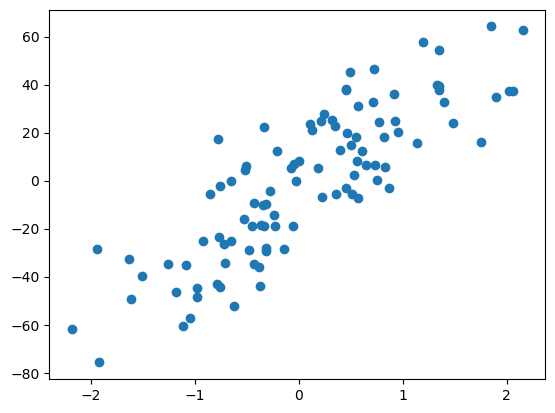

In [49]:
plt.scatter(X,y)

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
lr = LinearRegression()

In [56]:
lr.fit(X_train,y_train)


LinearRegression()

In [57]:
lr.coef_

array([28.12597332])

In [58]:
lr.intercept_

-2.271014426178382

In [60]:
## now we made our own class
## in this case both m and b are not constant but in earlier case m is constant
class GDRegression:
    
    def __init__(self,learning_rate,epochs):
        self.m = 100
        self.b= -120
        self.lr = learning_rate
        self.epochs= epochs
        
        def fit(self,X,y):
            #calculating b using GD
            for i in range(self.epochs):
                loss_slope_b= -2 * np.sum(y-self.m*X.ravel()-self.b)
                loss_slope_m = -2 * np.sum((y- self.m*X.ravel()-self.b)*X.ravel())
                
                self.b = self.b - (self.lr* loss_slope_b)
                self.m = self.m - (self.lr* loss_slope_m)
                
                print(self.m,self.b)
                
                def predict(self,X):
                    return self.m * X +self.b

In [61]:
gd = GDRegression(0.001,50)

In [71]:
gd.fit(X_train,y_train)

28.125973319843975 -2.27101442919929


In [63]:

gd.fit (X_train,y_train)

AttributeError: 'GDRegression' object has no attribute 'fit'

In [64]:
class GDRegressor:
    
    def __init__(self,learning_rate,epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X,y):
        # calcualte the b using GD
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b)*X.ravel())
            
            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
        print(self.m,self.b)
        
    def predict(self,X):
        return self.m * X + self.b
    

In [65]:
gd = GDRegressor(0.001,50)

In [66]:
gd.fit(X_train,y_train)

28.159367347119066 -2.3004574196824854


In [68]:
y_pred = gd.predict(X_test)


In [69]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6343842836315579